In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import geodatasets

In [3]:
# Load the CSV file
df = pd.read_csv('glo.csv', encoding='ISO-8859-1', low_memory=False)

# Display the first 5 rows
print(df.head())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... Unnamed: 51 Unnamed: 52 Unnamed: 53  \
0  Dominican Republic       2  ...         NaN         NaN         NaN   
1              Mexico       1  ...         NaN         NaN         NaN   
2         Philippines       5  ...         NaN         NaN         NaN   
3              Greece       8  ...         NaN         NaN         NaN   
4               Japan       4  ...         NaN         NaN         NaN   

   Unnamed: 54  Unnamed: 55  Unnamed: 56  Unnamed: 57 Unnamed: 58  \

In [5]:
# Check dataset shape
print(f"Dataset shape: {df.shape}")

# Basic statistics
print(df.describe())

# Column information (data types and non-null counts)
print(df.info())

# Check missing values
print(df.isnull().sum().sort_values(ascending=False))

Dataset shape: (181691, 61)
            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002704e+11    2002.638997       6.467277      15.505644   
std    1.325955e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991020e+11    1991.000000       4.000000       8.000000   
50%    2.009020e+11    2009.000000       6.000000      15.000000   
75%    2.014080e+11    2014.000000       9.000000      23.000000   
max    2.017120e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.

In [ ]:
# Drop unnecessary columns (example)
columns_to_drop = ['approxdate', 'resolution', 'location', 'doubtterr', 'alternative', 'multiple', 'specificity']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values for critical columns (e.g., 'region_txt', 'attacktype1_txt')
df_clean['region_txt']=df_clean['region_txt'].fillna('Unknown')
df_clean['attacktype1_txt']= df_clean['attacktype1_txt'].fillna('Unknown')
# Filter valid years (if needed)
df_clean = df_clean[df_clean['iyear'] >= 1970]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


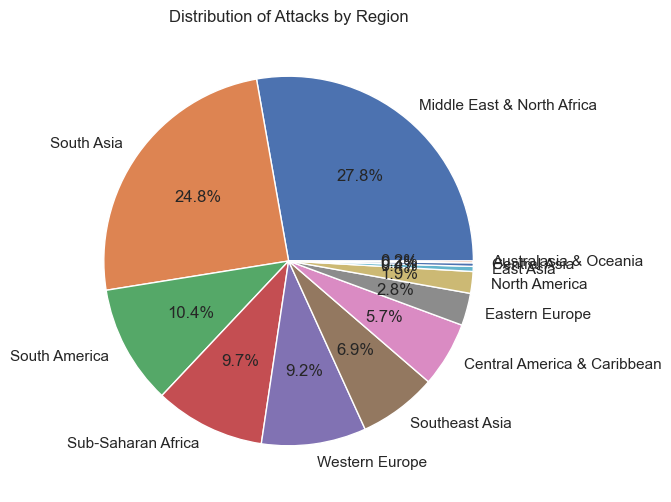

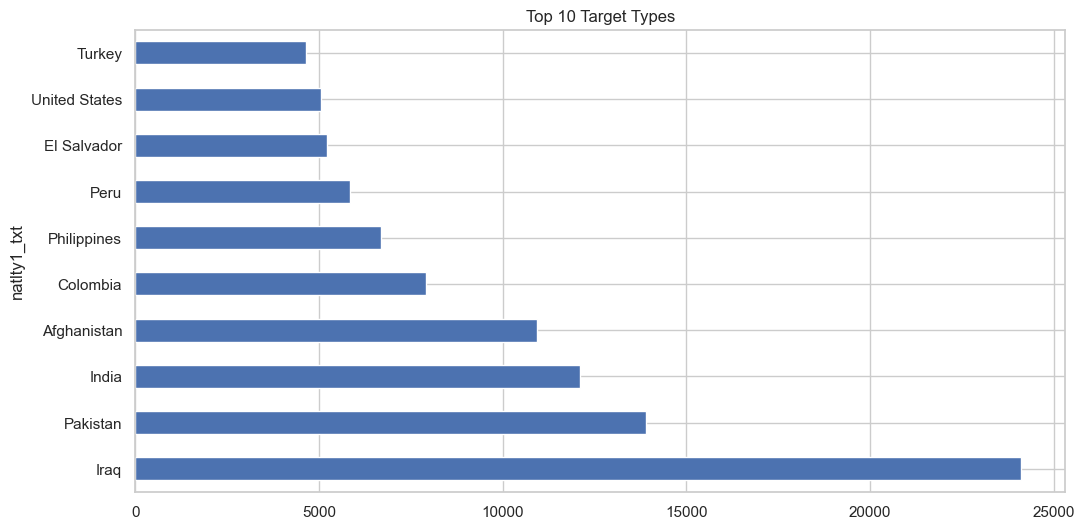

In [15]:
# Set plotting style
sns.set_theme(style="whitegrid")

# # Plot 1: Number of Attacks by Year
# plt.figure(figsize=(12, 6))
# sns.countplot(x='iyear', data=df_clean)
# plt.title('Terrorist Attacks by Year')
# plt.xticks(rotation=45)
# plt.show()

# # Plot 2: Top 10 Countries Affected
# plt.figure(figsize=(12, 6))
# df_clean['country_txt'].value_counts().head(10).plot(kind='bar')
# plt.title('Top 10 Countries by Number of Attacks')
# plt.show()

# # Plot 3: Most Common Attack Types
# plt.figure(figsize=(12, 6))
# df_clean['attacktype1_txt'].value_counts().head(10).plot(kind='bar')
# plt.title('Top 10 Attack Types')
# plt.show()

# # Plot 4: Target Types
# plt.figure(figsize=(12, 6))
# df_clean['targtype1_txt'].value_counts().head(10).plot(kind='barh')
# plt.title('Top 10 Target Types')
# plt.show()

# Plot 5: Region-wise Distribution
plt.figure(figsize=(12, 6))
df_clean['region_txt'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Attacks by Region')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12, 6))
df_clean['natlty1_txt'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Target Types')
plt.show()


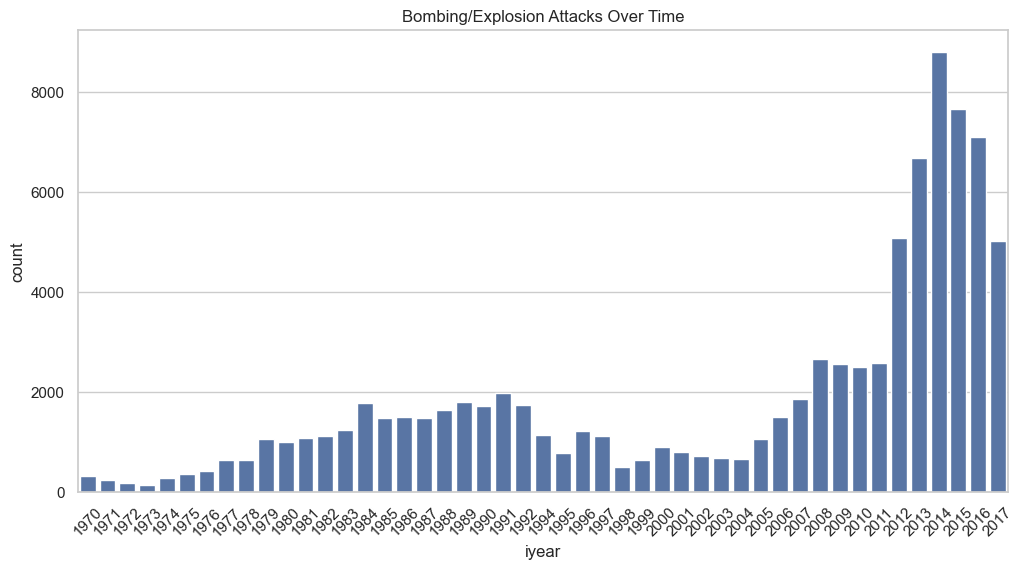

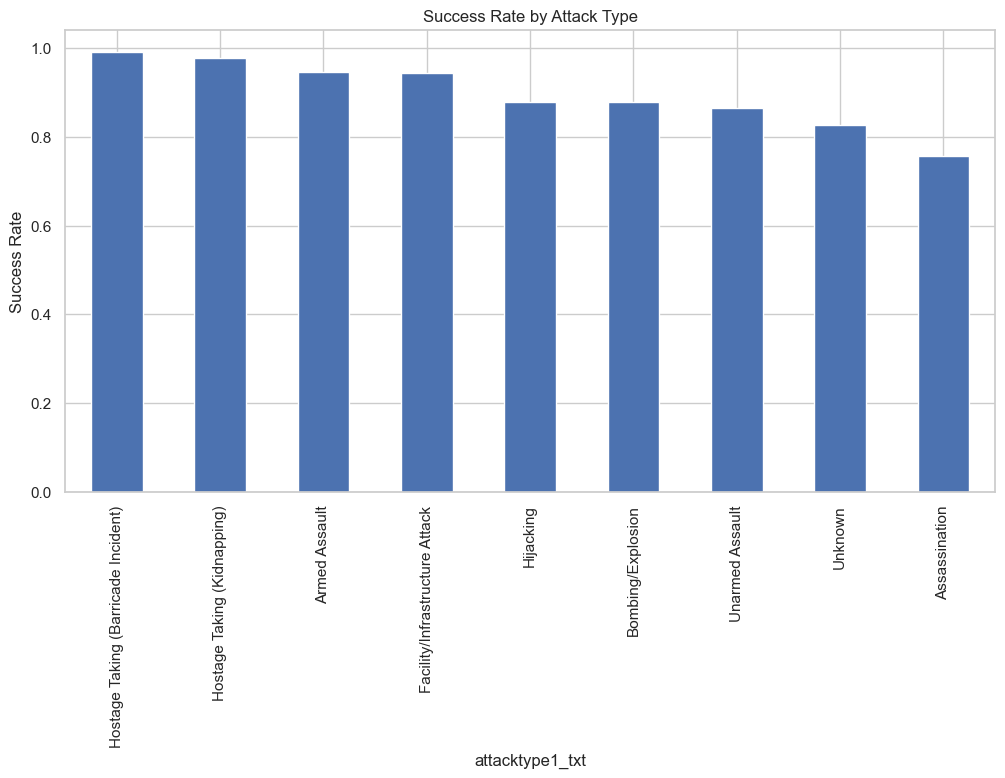

In [ ]:
# Trend of Bombings/Explosions Over Time
bombings = df_clean[df_clean['attacktype1_txt'] == 'Bombing/Explosion']
plt.figure(figsize=(12, 6))
sns.countplot(x='iyear', data=bombings)
plt.title('Bombing/Explosion Attacks Over Time')
plt.xticks(rotation=45)
plt.show()


# Success Rate of Attacks
success_rate = df_clean.groupby('attacktype1_txt')['success'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
success_rate.head(10).plot(kind='bar')
plt.title('Success Rate by Attack Type')
plt.ylabel('Success Rate')
plt.show()



In [ ]:
# Key Statistics
print(f"Total attacks: {len(df_clean)}")
print(f"Most attacked country: {df_clean['country_txt'].mode()[0]}")
print(f"Most common attack type: {df_clean['attacktype1_txt'].mode()[0]}")
print(f"Most frequent target: {df_clean['targtype1_txt'].mode()[0]}")


Total attacks: 181691
Most attacked country: Iraq
Most common attack type: Bombing/Explosion
Most frequent target: Private Citizens & Property


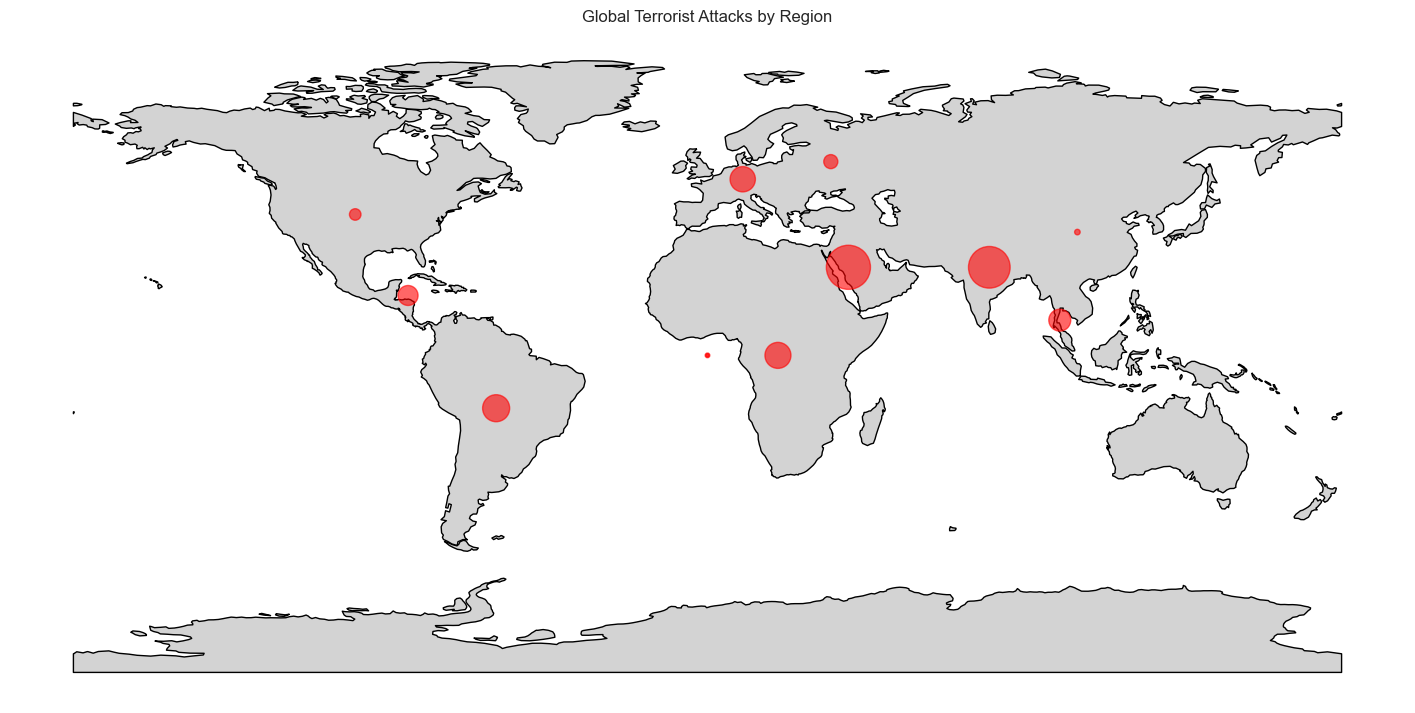

In [37]:
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
fig, ax = plt.subplots(figsize=(18, 12))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Your existing GeoDataFrame plotting code
gdf.plot(ax=ax, 
         markersize=gdf['total_attacks']/50, 
         color='red', 
         alpha=0.6,
         legend=True)

plt.title('Global Terrorist Attacks by Region')
plt.axis('off')
plt.show()
# df= pd.read_csv('glo.csv', encoding='ISO-8859-1', low_memory=False)

# # 1. Calculate total attacks per region
# region_attacks = df['region_txt'].value_counts().reset_index()
# region_attacks.columns = ['region', 'total_attacks']

# # print(# 1. Calculate total attacks per region
# # region_attacks)
# # print(region_attacks.columns)
# # missing_regions = region_attacks[~region_attacks['region'].isin(region_coords.keys())]
# # print("Missing regions:", missing_regions['region'].unique())

# #Create coordinates mapping for regions (approximate centroids)
# region_coords = {
#     'North America': (40, -100),
#     'Central America & Caribbean': (17, -85),
#     'South America': (-15, -60),
#     'Western Europe': (50, 10),
#     'Eastern Europe': (55, 35),
#     'Middle East & North Africa': (25, 40),
#     'Sub-Saharan Africa': (0, 20),
#     'East Asia': (35, 105),
#     'Southeast Asia': (10, 100),
#     'South Asia': (25, 80),
#     'Central Asia' :(0,0),
#     'Australasia & Oceania':(0,0),
#     'Oceania': (-25, 135)
# }

# # 3. Create GeoDataFrame
# region_attacks['latitude'] = region_attacks['region'].map(region_coords).apply(lambda x: x[0])
# # print(region_attacks['latitude'] )
# region_attacks['longitude'] = region_attacks['region'].map(region_coords).apply(lambda x: x[1])
# geometry = [Point(lon, lat) for lon, lat in zip(region_attacks['longitude'], region_attacks['latitude'])]
# gdf = gpd.GeoDataFrame(region_attacks, geometry=geometry)

# # Plot the map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# fig, ax = plt.subplots(figsize=(18, 12))
# world.plot(ax=ax, color='lightgray', edgecolor='black')

# # Plot attacks with size proportional to count
# gdf.plot(ax=ax, 
#          markersize=gdf['total_attacks']/50, 
#          color='red', 
#          alpha=0.6,
#          legend=True,
#          categorical=False)

# # Add labels
# for idx, row in gdf.iterrows():
#     ax.text(row.longitude+2, row.latitude, 
#             f"{row.region}\n{row.total_attacks} attacks",
#             fontsize=9,
#             ha='left')

# plt.title('Global Terrorist Attacks by Region (1970)')
# plt.axis('off')
# plt.show()

